# Most Prolific Top 10 Bands By The Number of Albums Released 

In [15]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None #'warn'
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as p
np.random.seed(sum(map(ord, "aesthetics")))
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [16]:
album_details = pd.read_csv("World_Music_Album_Details.csv", sep = ",", na_values=["N/A"], encoding = 'latin-1')
band_details = pd.read_csv("World_Music_Bands_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )
review_details = pd.read_csv("World_Music_Reviews_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )

In [17]:
music_bands_albums_join = pd.merge(
    left=band_details, 
    right=album_details, 
    left_on="ID", 
    right_on="Band_ID", 
    suffixes=["_band", "_album"],
    how="left"
).drop("Band_ID", axis=1)

In [50]:
music_bands_albums_join_count = pd.DataFrame(music_bands_albums_join.groupby("ID_band")["ID_album"].count().sort_values().tail(11))
music_bands_albums_join_count.columns = ["bands_count"] 
bands_albums_indexed = music_bands_albums_join_count.reset_index()
bands_albums_indexed.sort(ascending =False)

,ID_band,bands_count
10,6052,23
9,1582,18
8,1367,13
7,9130,12
6,8177,12
5,9320,12
4,5673,12
3,9624,11
2,4227,11
1,11217,11


In [60]:
bands_top10 = pd.merge(
    left=band_details,
    right=bands_albums_indexed,
    left_on="ID",
    right_index=True
)[["Band_Name", "bands_count"]].sort_values("bands_count").set_index("Band_Name")
bands_top10_indexed = bands_top10.reset_index()
band_top10_sort = bands_top10_indexed.sort(ascending = False)
band_top10_sort.to_csv('band_top10.csv')
band_top10_sort

,Band_Name,bands_count
9,Led Zeppelin,23
8,Megadeth,18
7,Gojira,13
6,Porcupine Tree,12
5,Pink Floyd,12
4,U2,12
3,The Beatles,12
2,Eagles,11
1,Coldplay,11
0,Aerosmith,11


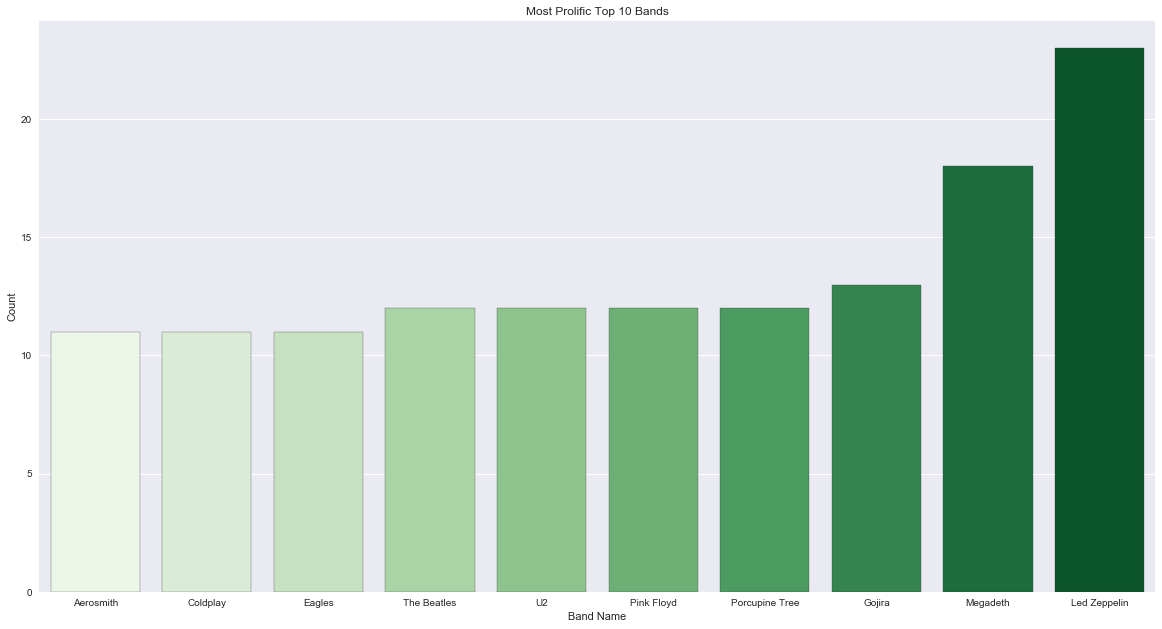

In [40]:
barplot = sns.barplot(x = bands_top10_indexed["Band_Name"],y = bands_top10_indexed["albums_count"], data = bands_top10_indexed, palette="Greens", edgecolor=".2")
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
barplot.set(xlabel = "Band Name", ylabel = "Count", title = "Most Prolific Top 10 Bands")

# Most Prolific Top 10 Albums By The Number of Reviews Recieved

In [21]:
music_bands_albums_reviews_join = pd.merge(
    left=music_bands_albums_join, 
    right=review_details, 
    left_on="ID_album", 
    right_on="Album_ID", 
    suffixes=["", "_review"],
    how="left"
).drop("Album_ID", axis=1)

In [55]:
music_albums_reviews_count = pd.DataFrame(music_bands_albums_reviews_join.groupby("ID_album")["ID"].count().sort_values().tail(10))
music_albums_reviews_count.columns = ["reviews_count"] 

In [63]:
albums_reviews_top10 = pd.merge(
    left=music_bands_albums_join,
    right=music_albums_reviews_count,
    left_on="ID_album",
    right_index=True
)[["Band_Name", "Album_Name", "reviews_count"]].sort_values("reviews_count")

albums_reviews_top10["band/album"] = albums_reviews_top10.Band_Name + "'s \"" + albums_reviews_top10.Album_Name + "\""

albums_top10_sort = albums_reviews_top10.sort(ascending = False)
albums_top10_sort.to_csv('albums_top10.csv')
albums_top10_sort

,Band_Name,Album_Name,reviews_count,band/album
12111,PandÃ¤monium,With Oden on Our Side,26,"PandÃ¤monium's ""With Oden on Our Side"""
7290,Berserker Barage,Illud Divinum Insanus,27,"Berserker Barage's ""Illud Divinum Insanus"""
7282,Berserker Barage,Altars of Madness,35,"Berserker Barage's ""Altars of Madness"""
7017,Ashes to Dust,From Beyond,28,"Ashes to Dust's ""From Beyond"""
6880,Apostate,The Ten Commandments,28,"Apostate's ""The Ten Commandments"""
5727,Vomitando Bilis,Close to a World Below,32,"Vomitando Bilis's ""Close to a World Below"""
3080,Qrixkuor,To Hell with God,30,"Qrixkuor's ""To Hell with God"""
3078,Qrixkuor,The Stench of Redemption,38,"Qrixkuor's ""The Stench of Redemption"""
3077,Qrixkuor,Scars of the Crucifix,30,"Qrixkuor's ""Scars of the Crucifix"""
3072,Qrixkuor,Legion,46,"Qrixkuor's ""Legion"""


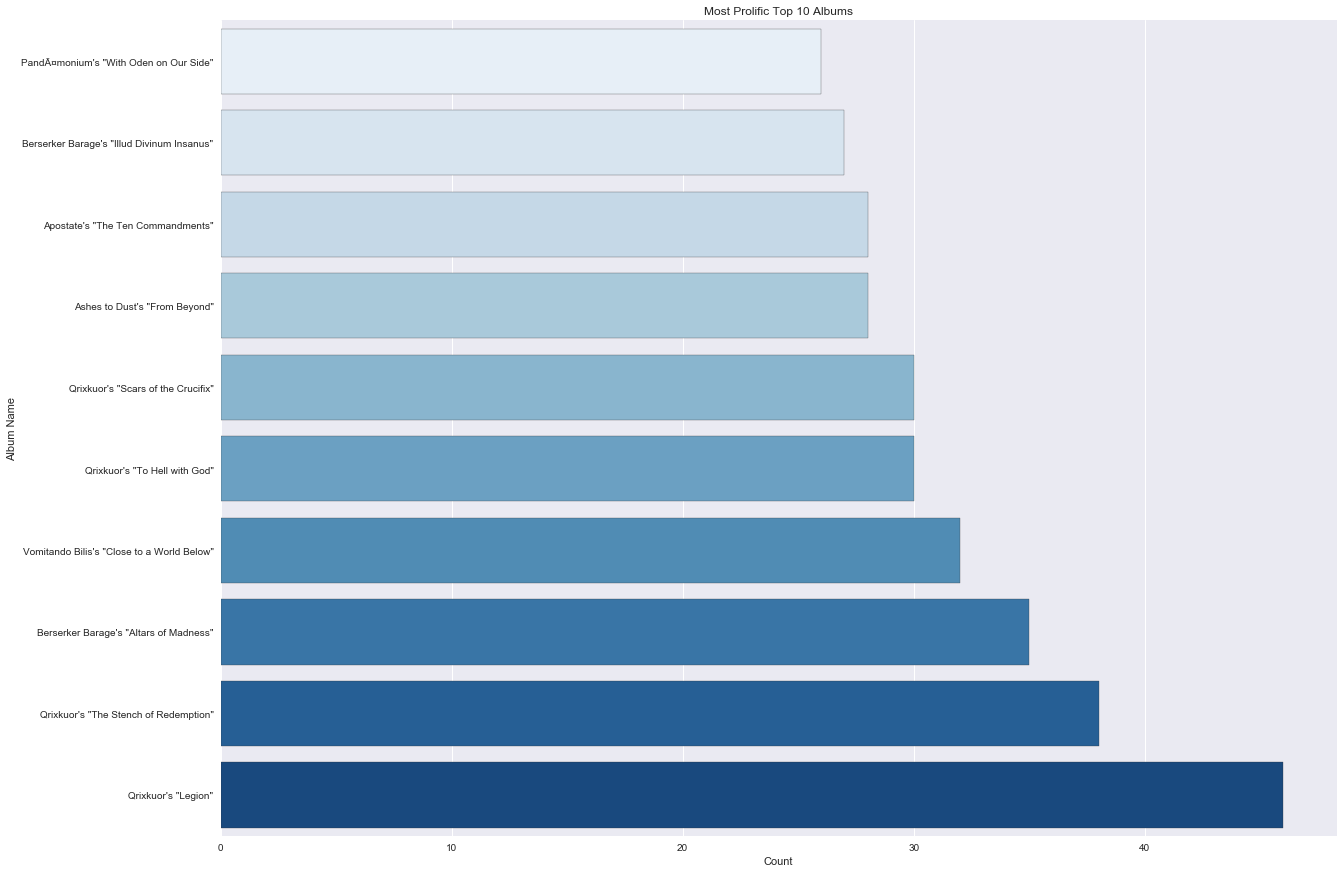

In [41]:
barplot = sns.barplot(x = reviews_more_reviews_top20["reviews_count"],y = reviews_more_reviews_top20["band/album"], data = albums_reviews_top10, palette="Blues", edgecolor=".2")
fig = plt.gcf()
fig.set_size_inches(20, 15)
barplot.set(xlabel = "Count", ylabel = "Album Name", title = "Most Prolific Top 10 Albums")